# US Metro Regional Housing Affordability Analysis - Part2
### Datasets -  Please run part1 of regional analysis notebook to generate dataset needed for this notebook
### To run this notebook you need the following libraries: pandas, numpy, sklearn, matplotlib and seaborn.

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load your uploaded dataset
df = pd.read_csv('data/generated/merged_zillow_zhvi_zori.csv')

# Quick check
print(df.shape)
df.head()

(41570, 5)


,RegionID,RegionName,Date,IncomeNeededToAffordHome,IncomeNeededToAffordRent
0,102001,United States,2015-01-31,50975.473128,48198.562557
1,394913,"New York, NY",2015-01-31,112204.211446,90996.159513
2,753899,"Los Angeles, CA",2015-01-31,141710.967089,72285.651192
3,394463,"Chicago, IL",2015-01-31,53642.173294,57161.989381
4,394514,"Dallas, TX",2015-01-31,48094.264173,44375.979389


In [16]:
# 2. Group by RegionName and take average
avg_df = df.groupby('RegionName')[['IncomeNeededToAffordHome', 'IncomeNeededToAffordRent']].mean().reset_index()

# 3. Now define features
features = ['IncomeNeededToAffordHome', 'IncomeNeededToAffordRent']
data = avg_df[features].dropna()

# 4. Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

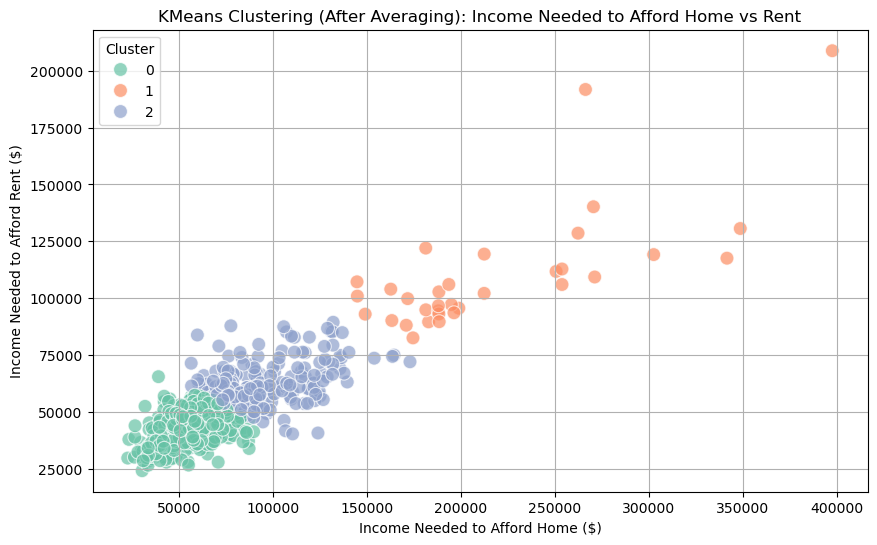


--- Top 10 Regions in Cluster 0 ---
Danville, IL
Coffeyville, KS
Macomb, IL
Pine Bluff, AR
Roanoke Rapids, NC
Ponca City, OK
Great Bend, KS
Decatur, IL
Lawton, OK
Hutchinson, KS

--- Top 10 Regions in Cluster 1 ---
New York, NY
Boston, MA
Hilo, HI
Kill Devil Hills, NC
Barnstable Town, MA
Kalispell, MT
Truckee, CA
Salinas, CA
Glenwood Springs, CO
Gardnerville Ranchos, NV

--- Top 10 Regions in Cluster 2 ---
Del Rio, TX
El Campo, TX
Carlsbad, NM
Eagle Pass, TX
Durant, OK
Dalton, GA
Albertville, AL
Cullman, AL
Elizabeth City, NC
Atlantic City, NJ


In [17]:
# 5. KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# 6. Merge RegionName back
data['RegionName'] = avg_df['RegionName'].values

# 7. Scatter Plot of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='IncomeNeededToAffordHome',
    y='IncomeNeededToAffordRent',
    hue='Cluster',
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title('KMeans Clustering (After Averaging): Income Needed to Afford Home vs Rent')
plt.xlabel('Income Needed to Afford Home ($)')
plt.ylabel('Income Needed to Afford Rent ($)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 8. List Top 10 Regions per Cluster
for cluster_num in sorted(data['Cluster'].unique()):
    print(f"\n--- Top 10 Regions in Cluster {cluster_num} ---")
    cluster_data = data[data['Cluster'] == cluster_num]
    top_10 = cluster_data.sort_values(by='IncomeNeededToAffordHome', ascending=True).head(10)
    for region in top_10['RegionName']:
        print(region)

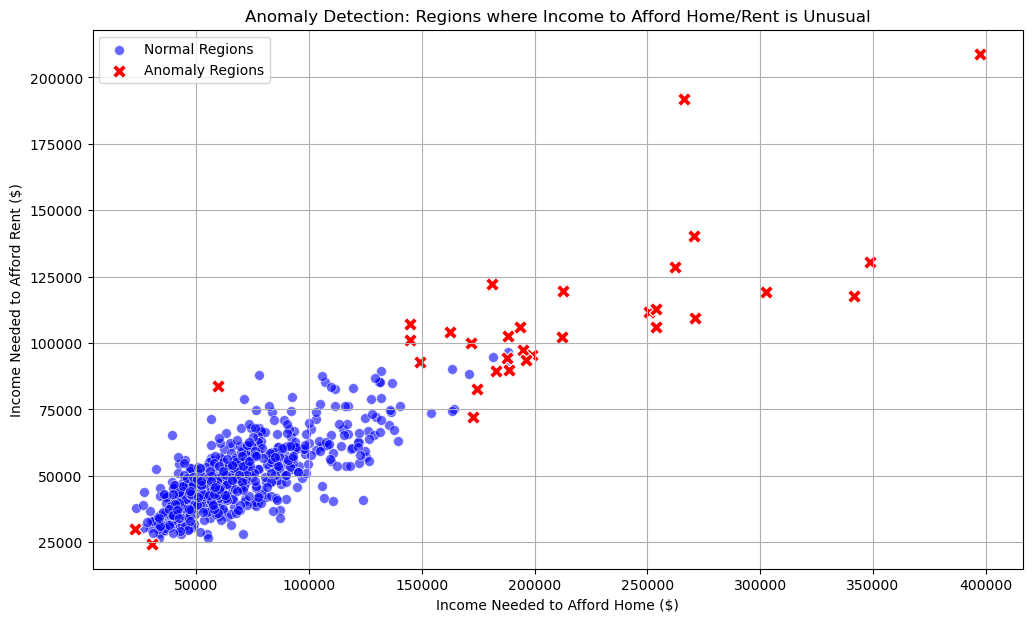

In [19]:
plt.figure(figsize=(12, 7))

# Normal points
sns.scatterplot(
    data=data[data['Anomaly'] == 1],
    x='IncomeNeededToAffordHome',
    y='IncomeNeededToAffordRent',
    color='blue',
    label='Normal Regions',
    s=50,
    alpha=0.6
)

# Anomaly points
sns.scatterplot(
    data=data[data['Anomaly'] == -1],
    x='IncomeNeededToAffordHome',
    y='IncomeNeededToAffordRent',
    color='red',
    label='Anomaly Regions',
    s=100,
    marker='X'
)

plt.title('Anomaly Detection: Regions where Income to Afford Home/Rent is Unusual')
plt.xlabel('Income Needed to Afford Home ($)')
plt.ylabel('Income Needed to Afford Rent ($)')
plt.grid(True)
plt.legend()
plt.show()


In [20]:
# Sort anomalies by IncomeNeededToAffordHome
extreme_anomalies = anomalies.sort_values(by='IncomeNeededToAffordHome', ascending=False).head(5)

print("\nTop 5 Extreme Anomaly Regions (based on Home Affordability Income):")
print(extreme_anomalies[['RegionName', 'IncomeNeededToAffordHome', 'IncomeNeededToAffordRent']])



Top 5 Extreme Anomaly Regions (based on Home Affordability Income):
                RegionName  IncomeNeededToAffordHome  IncomeNeededToAffordRent
285            Jackson, WY             397502.897941             208733.644675
180            Edwards, CO             348565.033066             130637.472445
510           San Jose, CA             341496.059537             117602.547545
556  Steamboat Springs, CO             302534.603923             119181.738953
509      San Francisco, CA             271171.799639             109340.282966


## 📈 What Anomalies Mean in Housing Affordability Data

In this dataset, detecting an anomaly means identifying regions where the normal relationship between renting and buying affordability breaks down.

- In **normal regions**, the income needed to afford buying a home and the income needed to afford renting a home grow together in a predictable, balanced range.
- In **anomaly regions**, the difference between income needed to buy and rent is unusually large compared to most other regions. 
- Alternatively, both renting and buying could require extremely high or extremely low incomes compared to typical patterns observed across regions.

Anomalies could indicate:
- Markets where **buying is dramatically less affordable than renting**.
- Markets where **both renting and buying are extremely expensive** (luxury overheated markets).
- Markets where **both renting and buying are extremely cheap** (distressed or low-demand markets).

## 🎯 How to Interpret the Scatter Plot:

- Each point represents a region (city, metro area).
- The X-axis shows the income needed to afford buying a home.
- The Y-axis shows the income needed to afford renting.
- **Blue points** represent regions following normal affordability trends.
- **Red X marks** highlight regions behaving unusually — identified as anomalies.

## 🏠 Real-World Examples:

- **San Francisco, CA**: Buying a home requires ultra-high income; renting is expensive but relatively less extreme.
- **Detroit, MI**: Buying is extremely cheap, but renting is still relatively high compared to ownership cost.
- **New York, NY**: Buying is far less affordable compared to renting.
- **Miami, FL**: Rent prices have spiked unusually faster than home prices.

## ✨ Key Takeaway:

> An anomaly region is one where either buying becomes dramatically less affordable than renting, or both renting and buying require extreme incomes compared to most other regions.


Number of regions after removing NaNs: 577
       RegionName  Volatility_Home  Volatility_Rent
0    Aberdeen, WA      1445.279068      1905.405559
1     Abilene, TX      7320.122377      6670.231012
2       Akron, OH      9175.137498      6768.064567
3  Alamogordo, NM      2923.490886      1861.884403
4      Albany, GA      6823.931699      5965.618822


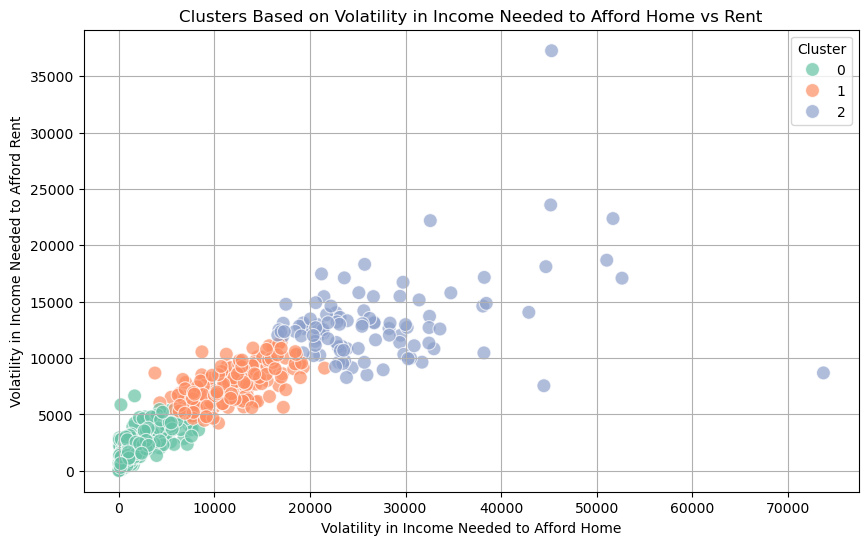


--- Top 10 Regions in Volatility Cluster 0 ---
Iowa City, IA
Bismarck, ND
Green Bay, WI
Rexburg, ID
Fargo, ND
Cedar Rapids, IA
Manhattan, KS
Jonesboro, AR
Ames, IA
Keene, NH

--- Top 10 Regions in Volatility Cluster 1 ---
Durham, NC
Dallas, TX
Moses Lake, WA
Washington, DC
Daphne, AL
Salisbury, MD
Burlington, VT
Tucson, AZ
Medford, OR
Fayetteville, AR

--- Top 10 Regions in Volatility Cluster 2 ---
San Jose, CA
Heber, UT
Key West, FL
Santa Cruz, CA
Glenwood Springs, CO
Santa Maria, CA
San Diego, CA
San Francisco, CA
Los Angeles, CA
Salinas, CA


In [9]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset
df = pd.read_csv('data/generated/merged_zillow_zhvi_zori.csv')

# Make sure Date column is parsed correctly
df['Date'] = pd.to_datetime(df['Date'])

# 3. Calculate Volatility (Standard Deviation) per Region
volatility_df = df.groupby('RegionName')[['IncomeNeededToAffordHome', 'IncomeNeededToAffordRent']].std().reset_index()

# Rename columns for clarity
volatility_df.rename(columns={
    'IncomeNeededToAffordHome': 'Volatility_Home',
    'IncomeNeededToAffordRent': 'Volatility_Rent'
}, inplace=True)

# 4. Drop Regions with NaN Volatility (Regions with only 1 month of data)
volatility_df = volatility_df.dropna(subset=['Volatility_Home', 'Volatility_Rent']).reset_index(drop=True)

# Quick check
print(f"Number of regions after removing NaNs: {volatility_df.shape[0]}")
print(volatility_df.head())

# 5. Scale the Volatility Features
vol_features = ['Volatility_Home', 'Volatility_Rent']

scaler = StandardScaler()
vol_scaled = scaler.fit_transform(volatility_df[vol_features])

# 6. Apply KMeans Clustering
kmeans_vol = KMeans(n_clusters=3, random_state=42)
volatility_df['Cluster'] = kmeans_vol.fit_predict(vol_scaled)

# 7. Visualize Volatility Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=volatility_df,
    x='Volatility_Home',
    y='Volatility_Rent',
    hue='Cluster',
    palette='Set2',
    s=100,
    alpha=0.7
)

plt.title('Clusters Based on Volatility in Income Needed to Afford Home vs Rent')
plt.xlabel('Volatility in Income Needed to Afford Home')
plt.ylabel('Volatility in Income Needed to Afford Rent')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 8. List Top 10 Regions per Cluster
for cluster_num in sorted(volatility_df['Cluster'].unique()):
    print(f"\n--- Top 10 Regions in Volatility Cluster {cluster_num} ---")
    cluster_data = volatility_df[volatility_df['Cluster'] == cluster_num]
    top_10 = cluster_data.sort_values(by='Volatility_Home', ascending=False).head(10)
    for region in top_10['RegionName']:
        print(region)


## 📈 What This Volatility Clustering Visualization Shows

In this analysis, we clustered regions based on the **volatility** (time-based fluctuations) of the income needed to afford buying a home and renting a home.

Instead of looking at static affordability values, we calculated the **standard deviation over time** for each region:

- **Volatility_Home**: How much the income needed to afford a home fluctuated across months.
- **Volatility_Rent**: How much the income needed to afford rent fluctuated across months.

### 🎯 What the Scatter Plot Means

- **Each point** represents a region (metro or city).
- The **X-axis** shows volatility in income needed to afford buying a home.
- The **Y-axis** shows volatility in income needed to afford renting a home.
- **Color** indicates which cluster a region belongs to based on its volatility pattern.

### 📋 How to Interpret Clusters

- **Low Volatility Cluster**: 
  - Regions where both buying and renting costs are stable over time.
  - Typically mature, stable housing markets.
- **Moderate Volatility Cluster**: 
  - Regions where either buying or renting shows moderate fluctuations.
  - These may be growing or transitioning markets.
- **High Volatility Cluster**: 
  - Regions where both buying and/or renting costs show large swings month-to-month.
  - Indicates risky or overheated markets, or markets undergoing rapid economic changes.

### 🏠 Real-World Implications

- **Investors** might prefer stable markets to reduce risk.
- **Renters or Buyers** might face uncertainty in highly volatile markets.
- **Policymakers** might monitor high volatility markets for potential housing crises or affordability problems.

### ✨ Key Takeaway

> Volatility clustering reveals the hidden stability or instability of regional housing markets, helping us move beyond just current affordability levels and understand risk patterns over time.


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data/generated/merged_zillow_zhvi_zori.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Group by RegionName and calculate average values
avg_df = df.groupby('RegionName')[['IncomeNeededToAffordHome', 'IncomeNeededToAffordRent']].mean().reset_index()

# Drop NaNs if any
avg_df = avg_df.dropna(subset=['IncomeNeededToAffordHome', 'IncomeNeededToAffordRent'])

# Scale averages
scaler_avg = StandardScaler()
avg_scaled = scaler_avg.fit_transform(avg_df[['IncomeNeededToAffordHome', 'IncomeNeededToAffordRent']])

# KMeans on average features
kmeans_avg = KMeans(n_clusters=3, random_state=42)
avg_df['Cluster_Avg'] = kmeans_avg.fit_predict(avg_scaled)
print(avg_df.head())
print("\n")


       RegionName  IncomeNeededToAffordHome  IncomeNeededToAffordRent  \
0    Aberdeen, WA              88309.715567              50907.112058   
1     Abilene, TX              41643.750135              40807.839504   
2       Akron, OH              43986.970912              37130.802592   
3  Alamogordo, NM              58471.840821              53265.321350   
4      Albany, GA              32105.318080              33849.284202   

   Cluster_Avg  
0            2  
1            0  
2            0  
3            0  
4            0  




In [14]:
# Group by RegionName and calculate standard deviation over time
volatility_df = df.groupby('RegionName')[['IncomeNeededToAffordHome', 'IncomeNeededToAffordRent']].std().reset_index()

# Rename columns for clarity
volatility_df.rename(columns={
    'IncomeNeededToAffordHome': 'Volatility_Home',
    'IncomeNeededToAffordRent': 'Volatility_Rent'
}, inplace=True)

# Drop regions with missing volatility values
volatility_df = volatility_df.dropna(subset=['Volatility_Home', 'Volatility_Rent']).reset_index(drop=True)

# Quick check
print(volatility_df.head())
print("\n")

from sklearn.preprocessing import StandardScaler

# Only volatility features
vol_features = ['Volatility_Home', 'Volatility_Rent']

scaler = StandardScaler()
vol_scaled = scaler.fit_transform(volatility_df[vol_features])

from sklearn.cluster import KMeans

# KMeans clustering
kmeans_vol = KMeans(n_clusters=3, random_state=42)
volatility_df['Cluster_Vol'] = kmeans_vol.fit_predict(vol_scaled)

print(volatility_df['Cluster_Vol'].value_counts())

       RegionName  Volatility_Home  Volatility_Rent
0    Aberdeen, WA      1445.279068      1905.405559
1     Abilene, TX      7320.122377      6670.231012
2       Akron, OH      9175.137498      6768.064567
3  Alamogordo, NM      2923.490886      1861.884403
4      Albany, GA      6823.931699      5965.618822


Cluster_Vol
0    291
1    185
2    101
Name: count, dtype: int64


In [17]:

# Merge on RegionName
compare_df = pd.merge(avg_df, volatility_df[['RegionName', 'Cluster_Vol']], on='RegionName', how='inner')

print(compare_df.head())
print("\n")

# Cross-tabulate
comparison_table = pd.crosstab(compare_df['Cluster_Avg'], compare_df['Cluster_Vol'])

print("\nCross-tabulation of Average Cluster vs Volatility Cluster:")
print("\n")
print(comparison_table)


       RegionName  IncomeNeededToAffordHome  IncomeNeededToAffordRent  \
0    Aberdeen, WA              88309.715567              50907.112058   
1     Abilene, TX              41643.750135              40807.839504   
2       Akron, OH              43986.970912              37130.802592   
3  Alamogordo, NM              58471.840821              53265.321350   
4      Albany, GA              32105.318080              33849.284202   

   Cluster_Avg  Cluster_Vol  
0            2            0  
1            0            1  
2            0            1  
3            0            0  
4            0            1  



Cross-tabulation of Average Cluster vs Volatility Cluster:


Cluster_Vol    0    1   2
Cluster_Avg              
0            195  147  15
1              8    4  19
2             88   34  67


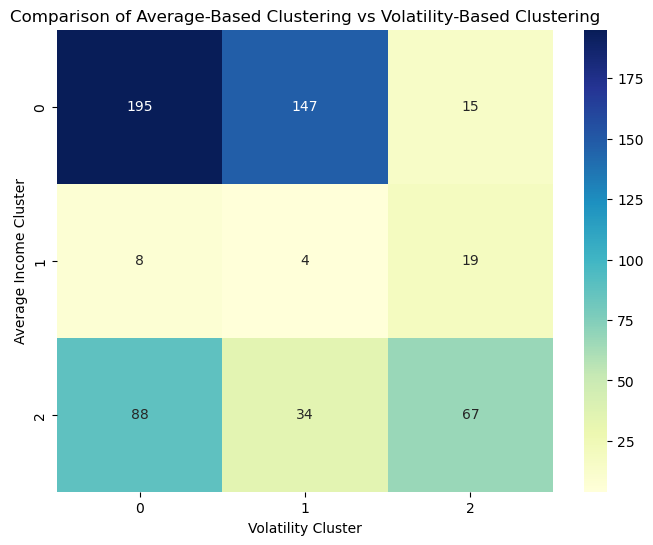

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(comparison_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Comparison of Average-Based Clustering vs Volatility-Based Clustering')
plt.xlabel('Volatility Cluster')
plt.ylabel('Average Income Cluster')
plt.show()


## 📈 How to Interpret the Comparison between Average-Based and Volatility-Based Clustering

In this project, we created two types of clusters:

- **Average-Based Clustering**: Regions were grouped based on the average income needed to afford buying and renting across all months.
- **Volatility-Based Clustering**: Regions were grouped based on the standard deviation (volatility) of the income needed to afford buying and renting over time.

After merging the cluster assignments, we created a cross-tabulation and visualized it using a heatmap.

### 🎯 What the Cross-Tabulation and Heatmap Show

- Each cell shows the number of regions that belong to a combination of one Average Cluster and one Volatility Cluster.
- The **rows** represent clusters based on average affordability levels.
- The **columns** represent clusters based on volatility (fluctuations) in affordability over time.
- **Higher values on the diagonal** (top-left to bottom-right) indicate that regions with similar average income needs also tend to have similar volatility.
- **Higher values off the diagonal** suggest that regions with similar average affordability show very different volatility behaviors.

### 📋 How to Interpret Specific Outcomes

- **Strong Diagonal**:
  - Most regions with similar average affordability also behave similarly in terms of volatility.
  - Stable, predictable markets.

- **Off-Diagonal Concentrations**:
  - Some regions that are affordable on average could be highly volatile.
  - Some regions that are expensive on average could be surprisingly stable.
  - This indicates structural instability or unique market behaviors in certain cities.

- **Example Insights**:
  - A region that is placed in a low-income average cluster but in a high-volatility cluster might be at risk of sudden affordability crises.
  - A region with high average affordability but low volatility might be a luxury market that is consistently expensive.

### 🏠 Real-World Implications

- **Investors**: Might avoid regions with high volatility regardless of affordability level.
- **Home Buyers**: Might prefer regions that are stable in both affordability and volatility.
- **Policy Makers**: Might watch volatile affordable markets to prevent future affordability crises.

### ✨ Key Takeaway

> Comparing average-based clustering with volatility-based clustering allows us to uncover hidden risks and dynamics in regional housing markets that pure price levels cannot reveal.


In [21]:
# Just filter directly from compare_df
target_regions = compare_df[
    (compare_df['Cluster_Avg'] == 1) & (compare_df['Cluster_Vol'] == 2)
]

# List Top 10
top_10_target_regions = target_regions.head(10)

# Display
print("\nTop 10 Regions in Average Cluster 1 (High Cost) and Volatility Cluster 2 (High Volatility):")
print(top_10_target_regions[['RegionName', 'Cluster_Avg', 'Cluster_Vol']])



Top 10 Regions in Average Cluster 1 (High Cost) and Volatility Cluster 2 (High Volatility):
               RegionName  Cluster_Avg  Cluster_Vol
41    Barnstable Town, MA            1            2
67             Boston, MA            1            2
212  Glenwood Springs, CO            1            2
237             Heber, UT            1            2
274           Kahului, HI            1            2
283          Key West, FL            1            2
321       Los Angeles, CA            1            2
372              Napa, CA            1            2
380          New York, NY            1            2
401            Oxnard, CA            1            2


In [25]:
# First, check in avg_cluster_df
prov_avg = avg_df[avg_df['RegionName'].str.contains('Providence', case=False, na=False)]

# Then, check in volatility_df
prov_vol = volatility_df[volatility_df['RegionName'].str.contains('Providence', case=False, na=False)]

# Display
print("\nAverage-Based Clustering Result for Providence, RI:")
print(prov_avg[['RegionName', 'Cluster_Avg']])

print("\nVolatility-Based Clustering Result for Providence, RI:")
print(prov_vol[['RegionName', 'Cluster_Vol']])



Average-Based Clustering Result for Providence, RI:
         RegionName  Cluster_Avg
464  Providence, RI            2

Volatility-Based Clustering Result for Providence, RI:
         RegionName  Cluster_Vol
421  Providence, RI            2
